In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


#### Exercise
##### You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

###### (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

###### (2) After removing outliers in step 1, you get a new dataframe.

###### (3) On step(2) dataframe, use 4 standard deviation to remove outliers

###### (4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

###### (5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [26]:
df = pd.read_csv("bhp.csv")
print("shape ",df.shape)
print("shape ",df.head())
df.describe()

shape  (13200, 7)
shape                     location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
min_x , max_x = df["price_per_sqft"].quantile([0.01,0.999])
print(min_x , max_x)

2549.0 50959.36200000098


In [ ]:
df_percentile = df[(df["price_per_sqft"] < max_x) & (df["price_per_sqft"] > min_x)]
print(df_percentile)
print(df_percentile.shape)

In [28]:
df.shape[0] - df_percentile.shape[0]

150


##### We removed total 150 outliers

In [ ]:
# step 2
mean = df_percentile["price_per_sqft"].mean()
print(mean)
std = df_percentile["price_per_sqft"].std()
print(std)

6704.4400766283525
4138.596163320734


In [10]:
# 4 standard deviation
min_std = mean - 4 * std
print(min_std) 
max_std = mean + 4 * std 
print(max_std) 

-9849.944576654585
23258.82472991129


In [12]:
df_no_outlier = df_percentile[(df_percentile["price_per_sqft"] > min_std) & (df_percentile["price_per_sqft"] < max_std)]
df_no_outlier.shape

(12925, 7)

In [29]:
df_percentile.shape[0] - df_no_outlier.shape[0]

125


##### We removed total 125 outliers

<Axes: xlabel='price_per_sqft', ylabel='Count'>

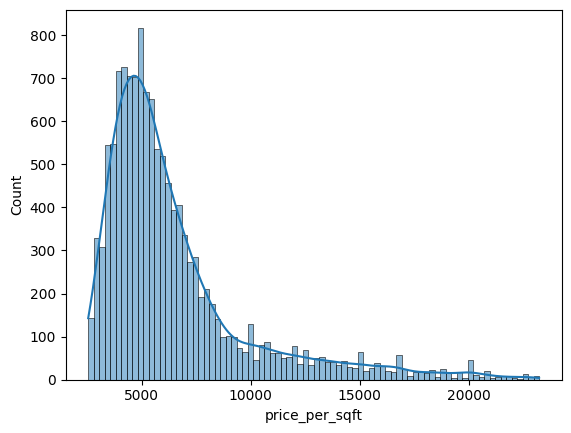

In [25]:
sn.histplot(df_no_outlier["price_per_sqft"], kde=True)


In [23]:
# z score on df_percentile

df_percentile["zscore"] = (df_percentile["price_per_sqft"] - df_percentile["price_per_sqft"].mean()) / df_percentile["price_per_sqft"].std()


df_zscore = df_percentile[(df_percentile['zscore'] >= -4) & (df_percentile['zscore'] <= 4)]
print(df_zscore.head())
print(df_zscore.shape)

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft    zscore  
0            3699 -0.726198  
1            4615 -0.504867  
2            4305 -0.579771  
3            6245 -0.111014  
4            4250 -0.593061  
(12925, 8)


In [30]:
df_percentile.shape[0] - df_zscore.shape[0]

125


##### We removed total 125 outliers. In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation